In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout


In [2]:
data_100 = pd.read_csv(r"E:/ECG data -RNN/Extract_folder_ECG/ECG_Dataset/100.csv")
data_100.tail()

,'sample #','MLII','V5'
649995,649995,1009,928
649996,649996,935,942
649997,649997,889,951
649998,649998,871,957
649999,649999,768,1024


In [3]:
data_100_drop = data_100.drop(columns=["'sample #'"])
print(data_100_drop)

        'MLII'  'V5'
0          995  1011
1          995  1011
2          995  1011
3          995  1011
4          995  1011
...        ...   ...
649995    1009   928
649996     935   942
649997     889   951
649998     871   957
649999     768  1024

[650000 rows x 2 columns]


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_100_normalized = scaler.fit_transform(data_100_drop)
print(data_100_normalized)

[[0.61927711 0.6504065 ]
 [0.61927711 0.6504065 ]
 [0.61927711 0.6504065 ]
 ...
 [0.49156627 0.56910569]
 [0.46987952 0.57723577]
 [0.34578313 0.66802168]]


In [37]:
# Tạo các mẫu dữ liệu
look_back = 30  # số lượng quan sát trước đó để dự đoán quan sát hiện tại
train_size = int(len(data_100_normalized) * 0.7)
train_data = data_100_normalized[:train_size, :]
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), :])
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

X_train, Y_train = create_dataset(train_data, look_back)

In [38]:
#print(X_train)
X_train.shape

(454969, 30, 2)

In [39]:
iterations = 5
hidden_layers = 3

In [40]:
# Xây dựng mô hình RNN với lớp Dropout và số lượng neuron tương ứng
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, 2), return_sequences=True))  # Thêm return_sequences=True để có 3 lớp LSTM
model.add(Dropout(0.2))  # Thêm lớp Dropout với tỷ lệ 0.2
model.add(LSTM(128, return_sequences=True))  # Thêm lớp LSTM thứ 2 với 64 neuron
model.add(Dropout(0.2))
model.add(LSTM(128))  # Thêm lớp LSTM thứ 3 với 64 neuron
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30, 128)           67072     
                                                                 
 dropout_19 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_22 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_20 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_23 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                

In [41]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, verbose=2)

Epoch 1/5
7109/7109 - 1319s - loss: 9.1613e-04 - accuracy: 0.9336 - 1319s/epoch - 186ms/step
Epoch 2/5
7109/7109 - 1351s - loss: 5.7123e-05 - accuracy: 0.9796 - 1351s/epoch - 190ms/step
Epoch 3/5
7109/7109 - 1407s - loss: 3.9760e-05 - accuracy: 0.9823 - 1407s/epoch - 198ms/step
Epoch 4/5
7109/7109 - 1453s - loss: 3.5060e-05 - accuracy: 0.9834 - 1453s/epoch - 204ms/step
Epoch 5/5
7109/7109 - 1492s - loss: 3.2660e-05 - accuracy: 0.9837 - 1492s/epoch - 210ms/step


In [ ]:

model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 2)))
model.add(Dropout(0.2))  # Thêm lớp Dropout với tỷ lệ 0.2
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam',metrics='accuracy')
model.fit(X_train, Y_train, epochs=30, batch_size=64, verbose=2)

In [42]:
# Đánh giá mô hình và dự đoán dữ liệu cho tương lai
test_data = data_100_normalized[train_size - look_back:, :]
X_test, Y_test = create_dataset(test_data, look_back)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)

6094/6094 [==============================] - 248s 41ms/step


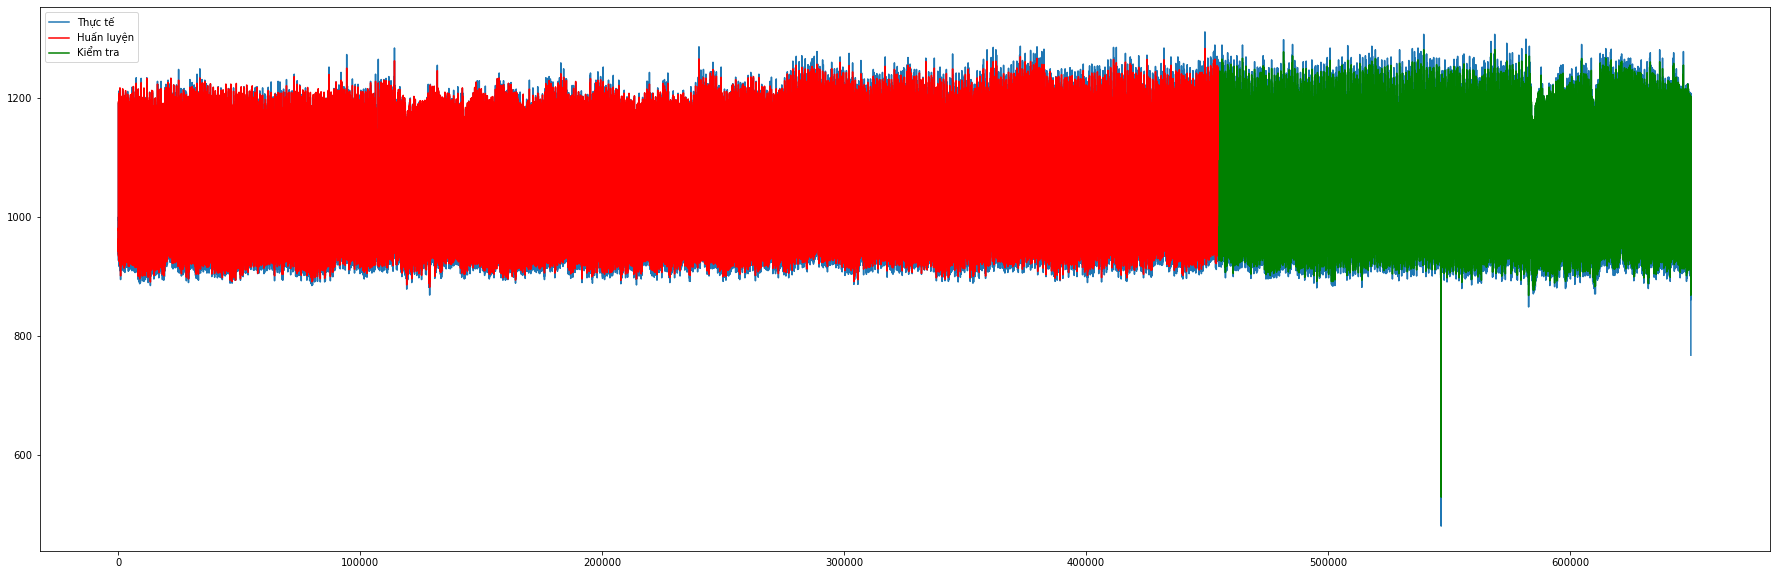

In [43]:
# Vẽ đồ thị dữ liệu và dự đoán nhiệt độ
plt.figure(figsize=(31, 10))
plt.plot(data_100["'MLII'"].values)
plt.plot(range(look_back, train_size - 1), train_predict[:, 0], color='red',)
plt.plot(range(train_size  , len(data_100)-1), test_predict[:, 0], color='green')
plt.legend(['Thực tế', 'Huấn luyện', 'Kiểm tra'])
plt.show()

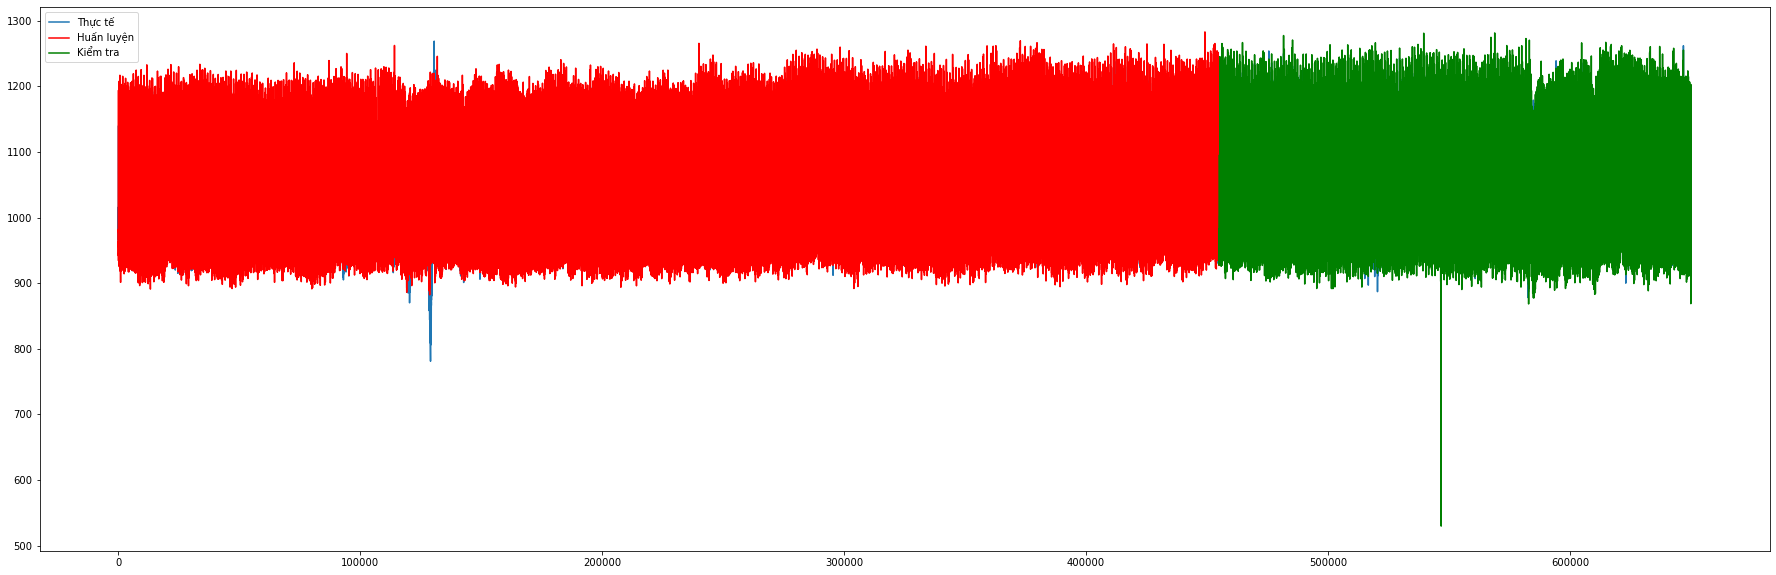

In [44]:
# Vẽ đồ thị dữ liệu và dự đoán nhiệt độ
plt.figure(figsize=(31, 10))
plt.plot(data_100["'V5'"].values)
plt.plot(range(look_back, train_size - 1), train_predict[:, 0], color='red',)
plt.plot(range(train_size  , len(data_100)-1), test_predict[:, 0], color='green')
plt.legend(['Thực tế', 'Huấn luyện', 'Kiểm tra'])
plt.show()

In [46]:
mse = mean_squared_error(train_predict,Y_train)
print(mse)

16.416805550855486


In [48]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=0.2, random_state=42)
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/10
4550/4550 - 1269s - loss: 156005.3906 - accuracy: 0.8980 - val_loss: 26590.6582 - val_accuracy: 0.9163 - 1269s/epoch - 279ms/step
Epoch 2/10
4550/4550 - 1319s - loss: 7259.6289 - accuracy: 0.9166 - val_loss: 1121.4294 - val_accuracy: 0.9163 - 1319s/epoch - 290ms/step
Epoch 3/10
4550/4550 - 1345s - loss: 2952.3191 - accuracy: 0.9166 - val_loss: 1119.1522 - val_accuracy: 0.9163 - 1345s/epoch - 296ms/step
Epoch 4/10
4550/4550 - 1366s - loss: 2930.6042 - accuracy: 0.9166 - val_loss: 1117.0629 - val_accuracy: 0.9163 - 1366s/epoch - 300ms/step
Epoch 5/10
4550/4550 - 1410s - loss: 2932.3352 - accuracy: 0.9166 - val_loss: 1116.8673 - val_accuracy: 0.9163 - 1410s/epoch - 310ms/step
Epoch 6/10
4550/4550 - 1436s - loss: 2922.2812 - accuracy: 0.9166 - val_loss: 1116.1284 - val_accuracy: 0.9163 - 1436s/epoch - 315ms/step
Epoch 7/10
4550/4550 - 1438s - loss: 2924.5354 - accuracy: 0.9166 - val_loss: 1118.1383 - val_accuracy: 0.9163 - 1438s/epoch - 316ms/step
Epoch 8/10
4550/4550 - 1473s - 

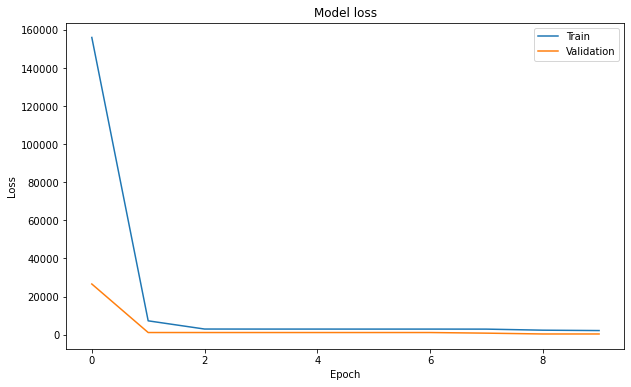

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

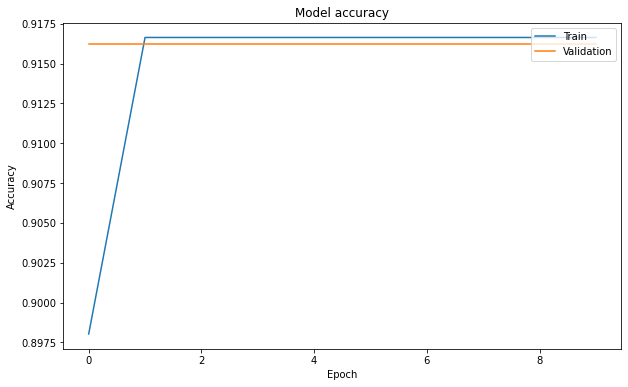

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
